In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [2]:
from binance.client import Client
from binance import enums
api_key = "your key"
api_secret = "your secret"
client = Client(api_key, api_secret)

In [3]:
symbols = [
    'BTC/USDT',
    'XRP/USDT', 
    'ETH/USDT', 
    'ADA/USDT', 
    'XLM/USDT', 
    'XVG/USDT', 
    'LTC/USDT', 
    'IOTA/USDT', 
    'QTUM/USDT', 
    'NEO/USDT', 
    'DASH/USDT', 
    'ETC/USDT', 
    'LSK/USDT', 
    'XMR/USDT', 
    'OMG/USDT', 
    'STRAT/USDT', 
    'ZEC/USDT',
    'BCC/USDT'
]

In [4]:
import cryptoz
from cryptoz import stats, utils
from cryptoz.data import binance

ohlc = binance.chartdata(client, symbols, interval=enums.KLINE_INTERVAL_30MINUTE)

In [5]:
orderbooks = binance.orderbooks(client, symbols)

# klines

    count         mean          std       min       25%        50%  \
0  1134.0  1089.179925  3194.369631  0.119567  3.595656  35.223632   

          75%      max  
0  515.159275  16055.0  


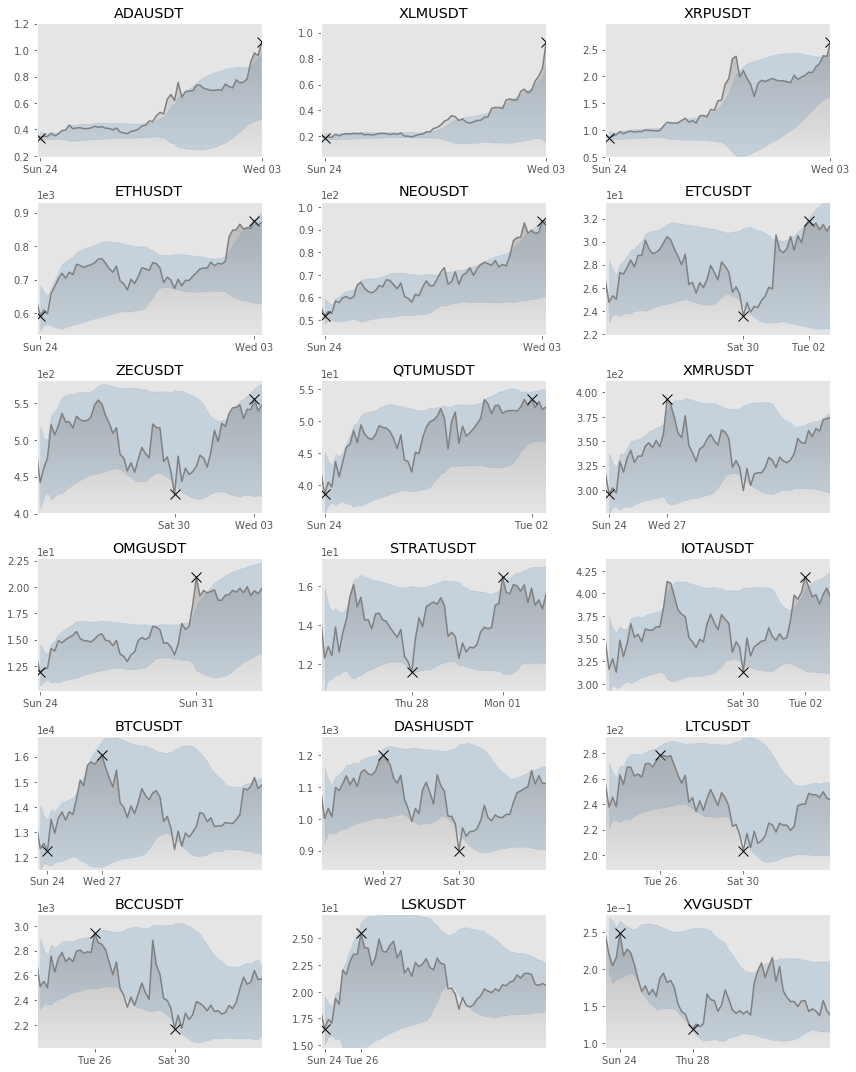

In [6]:
df = utils.to_df(ohlc, 'C').resample('4H').last()
sma = df.rolling(30, min_periods=1).mean()
sms = df.rolling(30, min_periods=1).std()
bands = (sma + 2 * sms, sma - 2 * sms)
ranker = lambda sr: 1 - sr.iloc[-1] / sr.max()

cryptoz.plot.timesr_matrix(df, bands=bands, ranker=ranker)

## pctchange

   count      mean       std       min       25%       50%      75%       max
0  846.0  0.001422  0.019869 -0.096839 -0.009516  0.001348  0.01081  0.102337


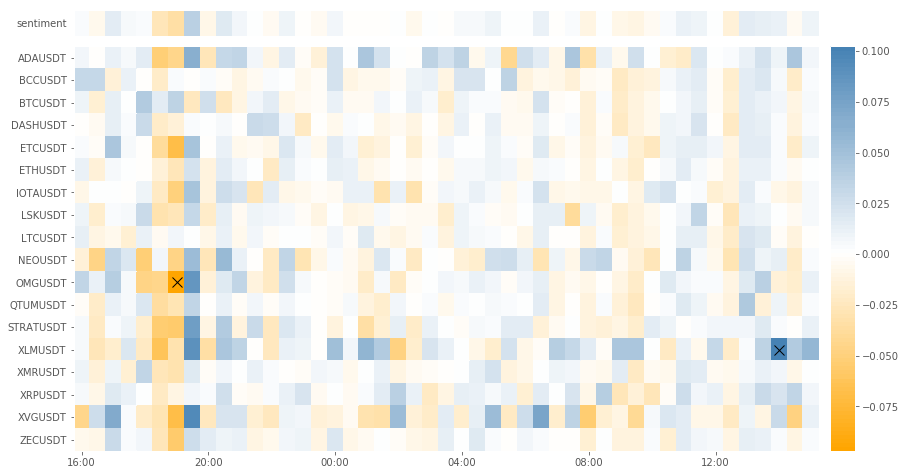

In [7]:
df = utils.to_df(ohlc, 'C').iloc[-48:]

cmap = cryptoz.plot.continuous_cmap(['orange', 'white', 'steelblue'])
norm = cryptoz.plot.midpoint_norm(0)
cryptoz.plot.evolution(df.pct_change().dropna(), cmap=cmap, norm=norm)

## hist

    count    mean       std       min       25%       50%       75%       max
0  9000.0  0.0008  0.020926 -0.180914 -0.008926  0.000972  0.010375  0.220623


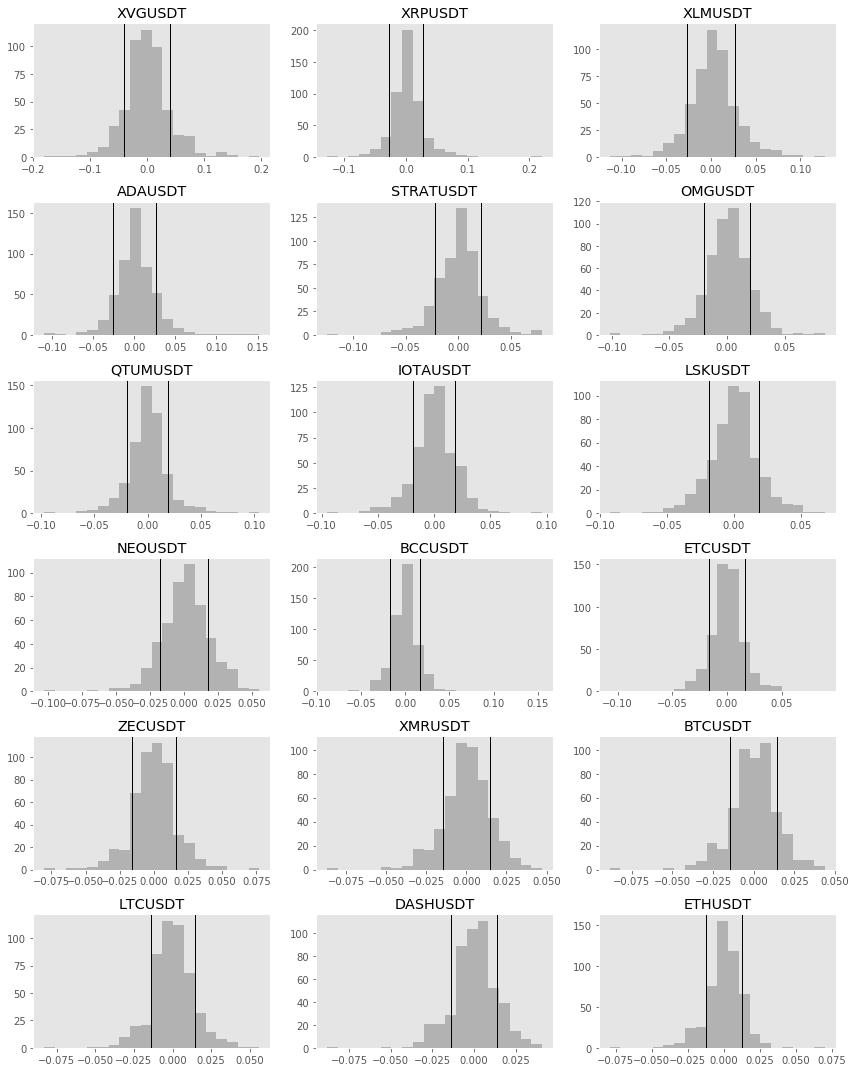

In [8]:
df = utils.to_df(ohlc, 'C').pct_change().fillna(0)
ranker = lambda sr: 1 / sr.std()
axvlines = [lambda sr: -sr.std(), lambda sr: sr.std()]
cryptoz.plot.hist_matrix(df, axvlines=axvlines, ranker=ranker)

# drawdown

   count      mean       std       min       25%       50%      75%       max
0  864.0  0.157614  0.097555  0.027449  0.105077  0.134251  0.17078  0.560608


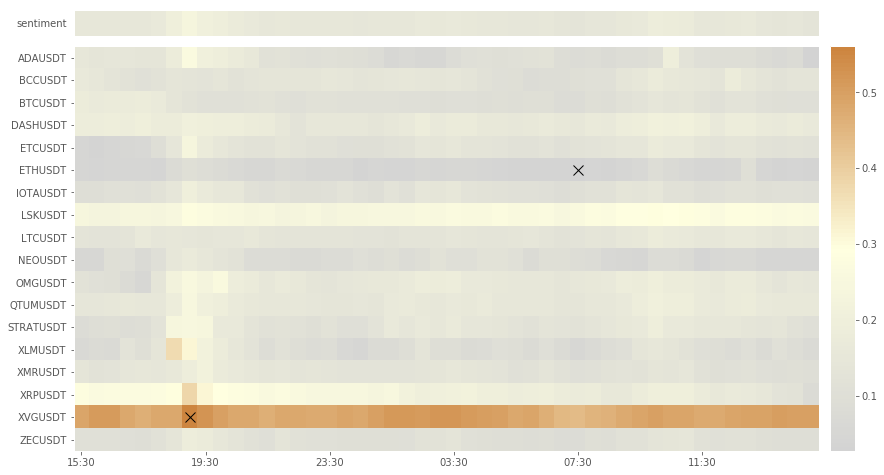

In [9]:
df = stats.dd.from_ohlc(ohlc).iloc[-48:]

cmap = cryptoz.plot.continuous_cmap(['lightgrey', 'lightyellow', 'peru'])
cryptoz.plot.evolution(df, cmap=cmap)

## current

In [10]:
stats.dd.now(ohlc)

XLMUSDT      0.015200
ADAUSDT      0.015601
ETHUSDT      0.032107
NEOUSDT      0.037496
XRPUSDT      0.063677
XMRUSDT      0.087663
ZECUSDT      0.089255
STRATUSDT    0.092356
BTCUSDT      0.098681
IOTAUSDT     0.102272
ETCUSDT      0.107255
BCCUSDT      0.125533
OMGUSDT      0.129668
LTCUSDT      0.143455
QTUMUSDT     0.146607
DASHUSDT     0.160821
LSKUSDT      0.259377
XVGUSDT      0.490994
dtype: float64

## max duration

In [11]:
stats.dd.max_duration(ohlc)

ADAUSDT     00:00:00
XRPUSDT     00:00:00
XMRUSDT     00:00:00
XLMUSDT     00:00:00
OMGUSDT     00:00:00
NEOUSDT     00:00:00
XVGUSDT     00:00:00
ZECUSDT     00:00:00
IOTAUSDT    00:00:00
ETHUSDT     00:00:00
ETCUSDT     00:00:00
BTCUSDT     00:00:00
LSKUSDT     00:00:00
BCCUSDT     00:30:00
STRATUSDT   01:00:00
DASHUSDT    01:00:00
QTUMUSDT    08:00:00
LTCUSDT     11:30:00
dtype: timedelta64[ns]

## recovery

   count      mean       std       min       25%      50%  75%  max
0  378.0  0.767968  0.820071  0.034965  0.295574  0.50049  1.0  7.0


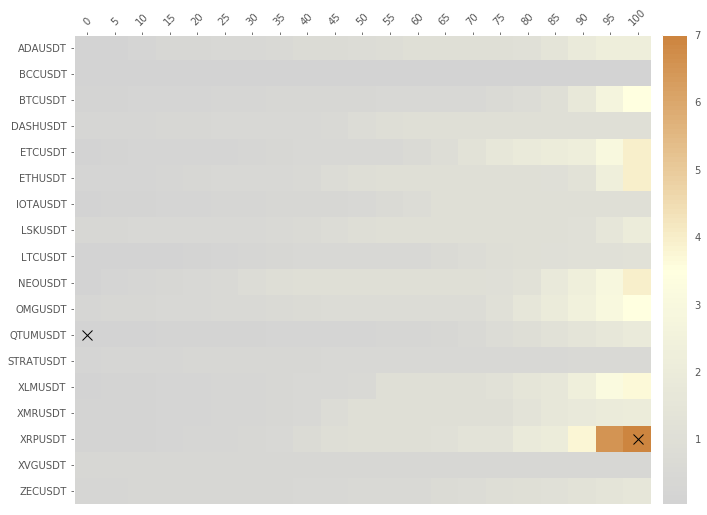

In [12]:
df = utils.to_df(stats.dd.details(ohlc), 'recovery_rate')
df = stats.dist.percentiles(df, 0, 100, 5).transpose()

cmap = cryptoz.plot.continuous_cmap(['lightgrey', 'lightyellow', 'peru'])
cryptoz.plot.heatmap(df, cmap=cmap)

# performance

   count      mean       std  min      25%       50%       75%  max
0  288.0 -0.304056  0.599705 -1.0 -0.76192 -0.519029  0.101448  1.0


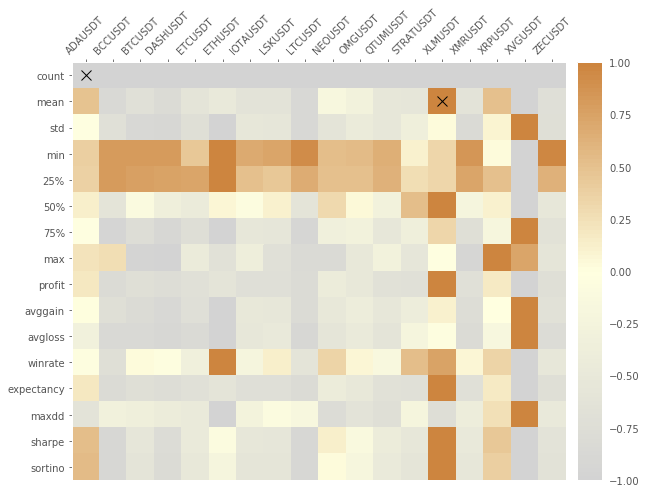

In [13]:
df = stats.perf.score_matrix(ohlc)

cmap = cryptoz.plot.continuous_cmap(['lightgrey', 'lightyellow', 'peru'])
cryptoz.plot.heatmap(df, cmap=cmap)

# correlation

   count      mean      std       min       25%       50%       75%  max
0  324.0  0.391687  0.43464 -0.663874  0.037908  0.496903  0.744784  1.0


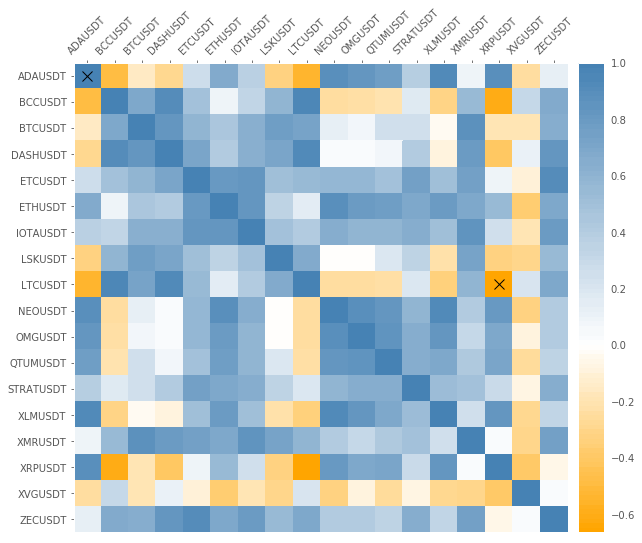

In [14]:
df = stats.corr.apply(utils.to_df(ohlc, 'C'))

cmap = cryptoz.plot.continuous_cmap(['orange', 'white', 'steelblue'])
norm = cryptoz.plot.midpoint_norm(0)
cryptoz.plot.heatmap(df, cmap=cmap, norm=norm)

## rolling

    count      mean      std       min       25%       50%       75%       max
0  6795.0  0.604363  0.42401 -0.862318  0.451967  0.751092  0.927856  0.992321


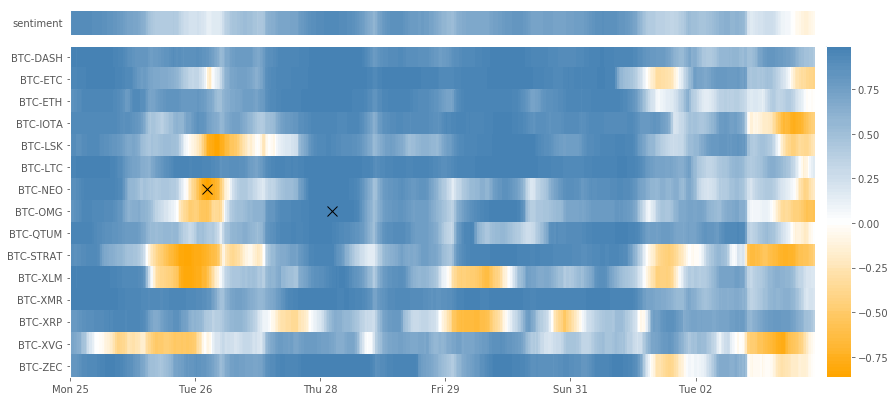

In [15]:
df = utils.to_df(ohlc, 'C')
df = stats.corr.rolling(df, window=48)
regex = re.compile(r'(BTCUSDT-.+)')
df = df[list(filter(regex.search, df.columns))]
df.columns = list(map(lambda x: re.sub(r'(USDT)', '', x), df.columns))

cmap = cryptoz.plot.continuous_cmap(['orange', 'white', 'steelblue'])
norm = cryptoz.plot.midpoint_norm(0)
cryptoz.plot.evolution(df.dropna(), cmap=cmap, norm=norm)

# depth

    count         mean            std           min            25%       50%  \
0  3600.0 -5716.983697  383238.906268 -1.574781e+06 -147104.873429  7.632534   

             75%           max  
0  161624.189271  2.255713e+06  


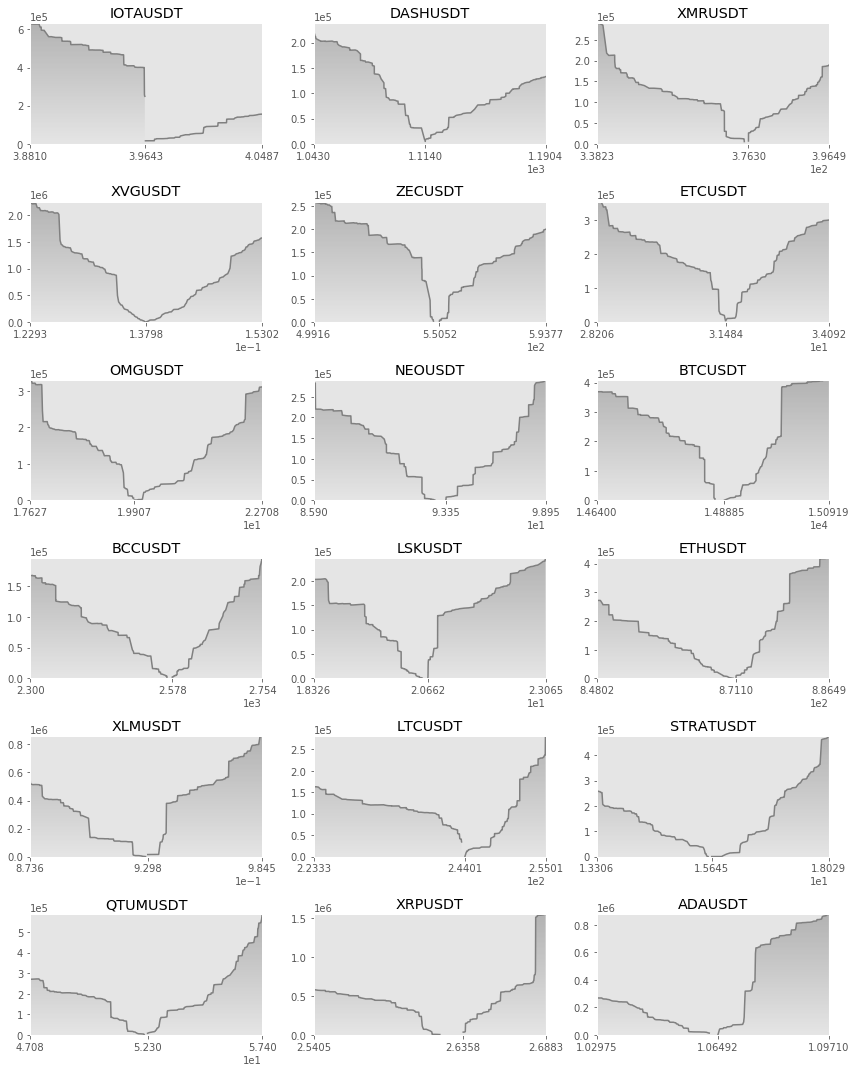

In [16]:
cryptoz.plot.depth(orderbooks, ranker=lambda sr: 1 - sr.max() / abs(sr.min()))

# score

## example: Bollinger Band

In [17]:
def rollmean(sr, window):
    return sr.rolling(window=window, min_periods=1).mean()

def rollstd(sr, window):
    return sr.rolling(window=window, min_periods=1).std()

def BollingerBand(sr, window, std_n):
    rollmean_sr = rollmean(sr, window)
    rollstd_sr = rollstd(sr, window)
    upper_band_sr = rollmean_sr + std_n * rollstd_sr
    lower_band_sr = rollmean_sr - std_n * rollstd_sr
    return upper_band_sr, lower_band_sr

def corridor(sr1, sr2):
    return sr1 - sr2

def normalize(sr):
    return (sr - sr.mean()) / sr.std()

### How wide is the BB?

    count      mean      std  min      25%       50%       75%  max
0  3438.0  0.168926  1.47778 -2.0 -1.26961  0.296102  1.738365  2.0


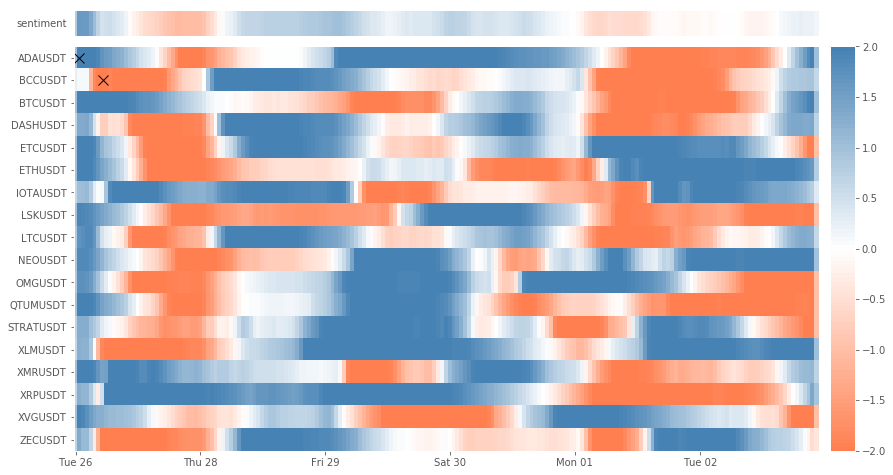

In [18]:
window = 120
std_n = 3

strategy = lambda ohlc_df: normalize(corridor(*BollingerBand(ohlc_df['C'], window, std_n)))
df1 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score1_df = cryptoz.score.rolling_apply(df1, window=window, min_periods=window)
score1_df.dropna(inplace=True)

cmap = cryptoz.plot.continuous_cmap(['coral', 'white', 'steelblue'])
norm = cryptoz.plot.midpoint_norm(0)
cryptoz.plot.evolution(score1_df.resample('1h').sum(), cmap=cmap, norm=norm)

### Is the price above the MA?

    count      mean       std  min       25%       50%       75%  max
0  3438.0  0.077546  1.126119 -2.0 -0.904311  0.081637  1.064818  2.0


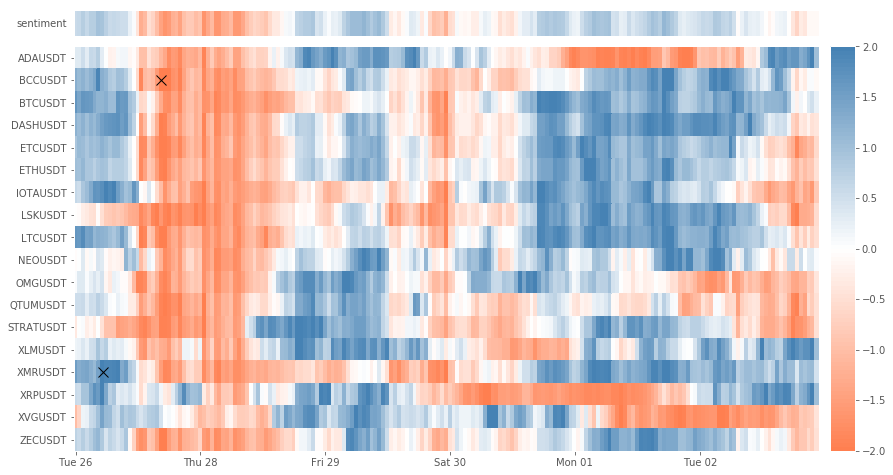

In [19]:
strategy = lambda ohlc_df: normalize(corridor(ohlc_df['C'], rollmean(ohlc_df['C'], window)))
df2 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score2_df = cryptoz.score.rolling_apply(df2, window=window, min_periods=window)
score2_df.dropna(inplace=True)

cryptoz.plot.evolution(score2_df.resample('1h').sum(), cmap=cmap, norm=norm)

### When to buy/sell?

Rules
1. narrow corridor and price over MA -> trend up -> buy
2. wide corridor and price below MA -> oversold -> buy
3. narrow corridor and price below MA -> trend down -> sell
4. wide corridor and price above MA -> overbought -> sell

    count      mean       std  min       25%       50%       75%  max
0  3438.0 -0.491191  1.044007 -2.0 -1.385368 -0.705199  0.295218  2.0


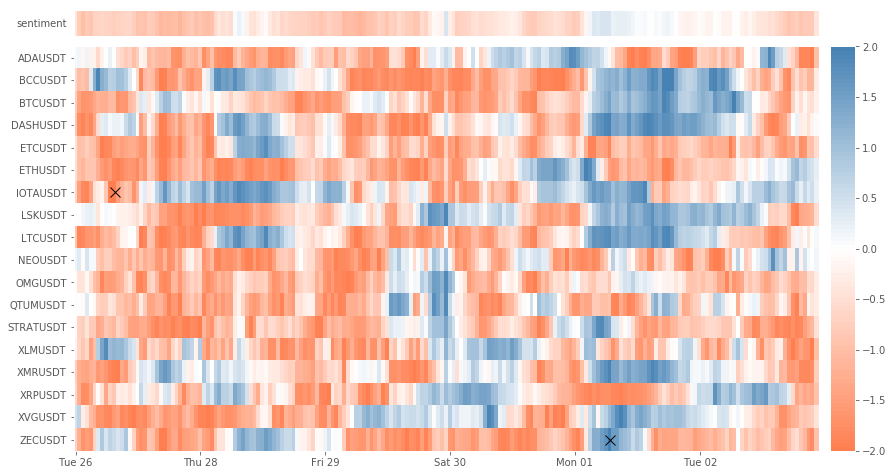

In [20]:
score_df = cryptoz.score.diff(score1_df, score2_df, axis=0) # axis 0: pair-local score
score_df.dropna(inplace=True)

cryptoz.plot.evolution(score_df.resample('1h').sum(), cmap=cmap, norm=norm)